### Topic Modeling

In [1]:
import pandas as pd
import nltk
import json
import numpy as np
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer
import string
import spacy
import en_core_web_sm
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec
import pprint
from operator import itemgetter

from sklearn import cluster
from sklearn import metrics

import seaborn
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from Data_Processor import clean, Data_Processor

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hwk97\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hwk97\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hwk97\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
DP=Data_Processor(start_month='2017-01',end_month='2020-05',template="./Data/Wealth_Management")
month_id = []

In [3]:
raw_data = {}
for year in ['2017','2018','2019', '2020']:
    for i in range(1,13):
        template = "Wealth_Management"+year+"-"
        month = '0'+str(i) if(i<10) else str(i)
        month_id.append(year+month)
        if year=='2020' and i>5:
            break
        filename = template + month + '.json'
        with open(filename) as f_in:
            file = json.load(f_in)
        text = [t['text'] for t in file]
        raw_data[year+month] = raw_data.get(year+month,[]) + text

In [4]:
data = raw_data.copy()
len(data['201712'])

9354

In [5]:
token_data = {}
string_data = {}

#### Data clean

In [6]:
for k in data:
    data[k] = clean(data[k])
    token_data[k] = []
    string_data[k] = []
    for sent in data[k]:
        token_data[k].append(DP.getngrams(data=sent,num=1,lemma=True))
        string_data[k].append(" ".join(token_data[k][-1]))

In [7]:
print(token_data['202005'][0])
print(string_data['202005'][0])

['like', 'people', 'sort', 'moral', 'compass', 'work', 'big', 'bank', 'tech', 'company', 'like', 'google', 'apple', 'facebook', 'feel', 'gross', 'unethical', 'iphone', 'bank', 'account', 'yall', 'sleep', 'night']
like people sort moral compass work big bank tech company like google apple facebook feel gross unethical iphone bank account yall sleep night


In [8]:
#save token data and string data
with open('token_data.txt','w') as file:
     file.write(json.dumps(token_data)) # use `json.loads` to do the reverse
with open('string_data.txt','w') as file:
     file.write(json.dumps(string_data)) # use `json.loads` to do the reverse

In [9]:
spacy_nlp = en_core_web_sm.load()
extract_words = {}

# Part-of-speech tagging (here extract nones)
def pos_tagging(data):
    req_tag = ['NN']
    list_words = []
    try:
        for x in data:
            doc = spacy_nlp(x)
            words = []
            for token in doc:
                if token.tag_ in req_tag and token.shape_ != 'x' and token.shape_ != 'xx' and token.shape_ != 'xxx':
                    words.append(token.lemma_)
            if words:
                list_words.append(words)
        return list_words
    except Exception as e:
        return list_words

In [10]:
for k in string_data:
    print("pos tagging",k)
    extract_words[k] = pos_tagging(string_data[k])

pos tagging 201701
pos tagging 201702
pos tagging 201703
pos tagging 201704
pos tagging 201705
pos tagging 201706
pos tagging 201707
pos tagging 201708
pos tagging 201709
pos tagging 201710
pos tagging 201711
pos tagging 201712
pos tagging 201801
pos tagging 201802
pos tagging 201803
pos tagging 201804
pos tagging 201805
pos tagging 201806
pos tagging 201807
pos tagging 201808
pos tagging 201809
pos tagging 201810
pos tagging 201811
pos tagging 201812
pos tagging 201901
pos tagging 201902
pos tagging 201903
pos tagging 201904
pos tagging 201905
pos tagging 201906
pos tagging 201907
pos tagging 201908
pos tagging 201909
pos tagging 201910
pos tagging 201911
pos tagging 201912
pos tagging 202001
pos tagging 202002
pos tagging 202003
pos tagging 202004
pos tagging 202005


In [11]:
with open('extract_words.txt','w') as file:
     file.write(json.dumps(extract_words)) # use `json.loads` to do the reverse

### Method 1: LDA

In [12]:
lda = {}
def LDA(texts,topics=10,num_words=15):
    dictionary = corpora.Dictionary(texts) # texts: list of list of words
    corpus = [dictionary.doc2bow(text) for text in texts]
    num_topics = topics #The number of topics that should be generated
    passes = 20
    lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)
    #pp = pprint.PrettyPrinter(indent=4)
    #pp.pprint(lda.print_topics(num_words=num_words))
    
    # correlation between a tweet and each topic
    #pp.pprint(sorted(lda.get_document_topics(corpus[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True))
    return lda

In [13]:
for k in extract_words:
    print("lda modeling", k)
    lda[k] = LDA(extract_words[k], topics=10, num_words=15)

lda modeling 201701
lda modeling 201702
lda modeling 201703
lda modeling 201704
lda modeling 201705
lda modeling 201706
lda modeling 201707
lda modeling 201708
lda modeling 201709
lda modeling 201710
lda modeling 201711
lda modeling 201712
lda modeling 201801
lda modeling 201802
lda modeling 201803
lda modeling 201804
lda modeling 201805
lda modeling 201806
lda modeling 201807
lda modeling 201808
lda modeling 201809
lda modeling 201810
lda modeling 201811
lda modeling 201812
lda modeling 201901
lda modeling 201902
lda modeling 201903
lda modeling 201904
lda modeling 201905
lda modeling 201906
lda modeling 201907
lda modeling 201908
lda modeling 201909
lda modeling 201910
lda modeling 201911
lda modeling 201912
lda modeling 202001
lda modeling 202002
lda modeling 202003
lda modeling 202004
lda modeling 202005


In [14]:
## save the model
for k in lda:
    lda[k].save('lda_'+k+'.model')

Text(0.5, 0.98, '2020 Feb - E*Trade Acqusition (first row second one)')

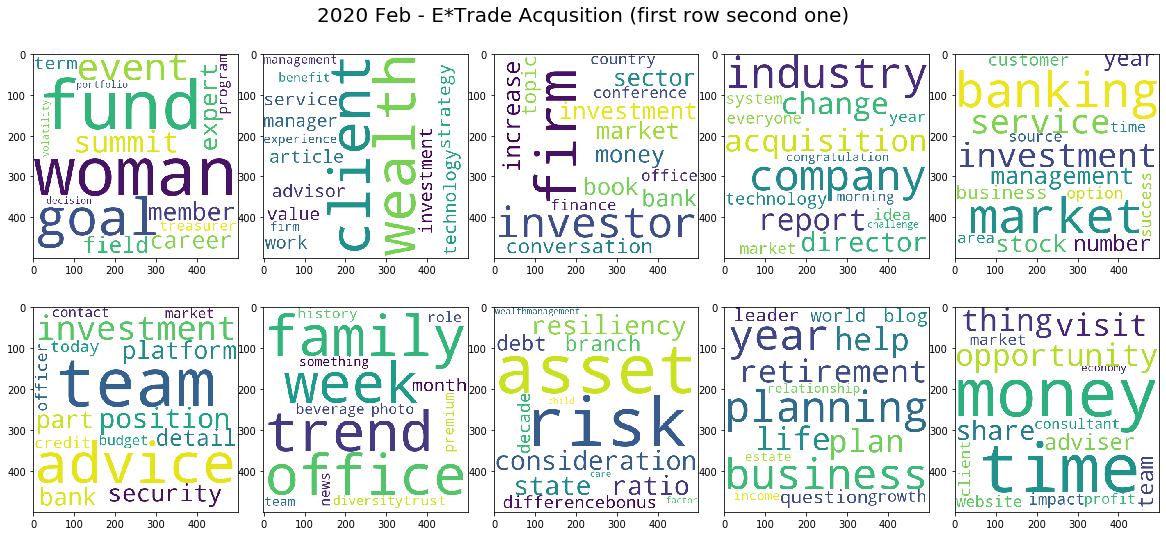

In [15]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))

# topic 2 in 2020 Feb
for i in range(10):
    k = '202002'
    topic = " ".join([w for w,p in lda[k].show_topic(i, 15)])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    fig.tight_layout(pad = 0) 

fig.suptitle("2020 Feb - E*Trade Acqusition (first row second one)", fontsize=20)

Text(0.5, 0.98, '2020 April - Coronavirus, Crisis (first & second row fourth one)')

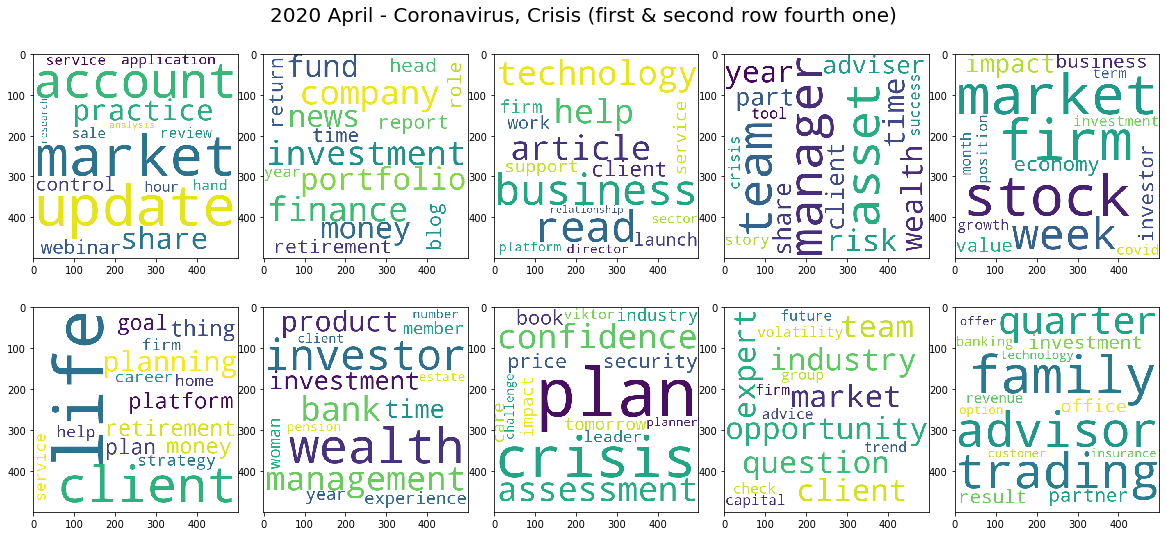

In [16]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
i = 0
for i in range(10):
    k = '202004'
    topic = " ".join([w for w,p in lda[k].show_topic(i, 15)])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
fig.suptitle("2020 April - Coronavirus, Crisis (first & second row fourth one)", fontsize=20)

In [17]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda['202004'].print_topics(num_words=15))

[   (   0,
        '0.125*"market" + 0.061*"update" + 0.025*"account" + 0.023*"practice" '
        '+ 0.018*"share" + 0.016*"webinar" + 0.014*"control" + '
        '0.012*"application" + 0.012*"review" + 0.012*"service" + 0.010*"hour" '
        '+ 0.010*"sale" + 0.009*"hand" + 0.009*"analysis" + 0.009*"research"'),
    (   1,
        '0.065*"investment" + 0.059*"finance" + 0.054*"company" + '
        '0.046*"portfolio" + 0.029*"money" + 0.025*"fund" + 0.021*"news" + '
        '0.020*"retirement" + 0.019*"blog" + 0.017*"report" + 0.014*"head" + '
        '0.014*"return" + 0.013*"time" + 0.013*"role" + 0.013*"year"'),
    (   2,
        '0.057*"business" + 0.041*"read" + 0.036*"technology" + 0.028*"help" + '
        '0.027*"article" + 0.026*"client" + 0.020*"support" + 0.019*"launch" + '
        '0.019*"firm" + 0.016*"service" + 0.015*"work" + 0.014*"platform" + '
        '0.014*"director" + 0.013*"sector" + 0.012*"relationship"'),
    (   3,
        '0.044*"manager" + 0.043*"team" + 0.0

Text(0.5, 0.98, '2020 May - Return, Recovery (second row fourth one)')

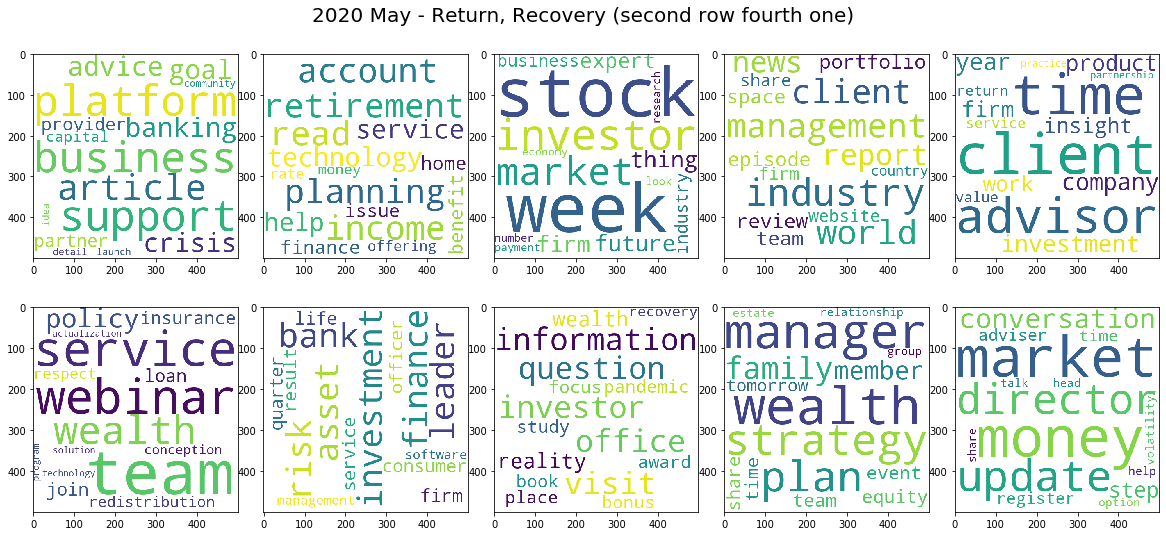

In [18]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
i = 0
for i in range(10):
    k = '202005'
    topic = " ".join([w for w,p in lda[k].show_topic(i, 15)])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
fig.suptitle("2020 May - Return, Recovery (second row fourth one)", fontsize=20)

### Method 2 Non-negative Natrix Factorization (NMF)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
stop = set(stopwords.words('english'))
stop.update(('http','llc','inc', 'twitter', 'tweet'))

doc_term_matrix = {}
tfidf_vect = {}
nmf = {}

In [20]:
for k in string_data:
    tfidf_vect[k] = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=stop)
    doc_term_matrix[k] = tfidf_vect[k].fit_transform(string_data[k])
    nmf[k] = NMF(n_components=10, random_state=42)
    nmf[k].fit(doc_term_matrix[k])

Text(0.5, 0.98, '2019 Sep - Brokerdealers Price War (second row first one)')

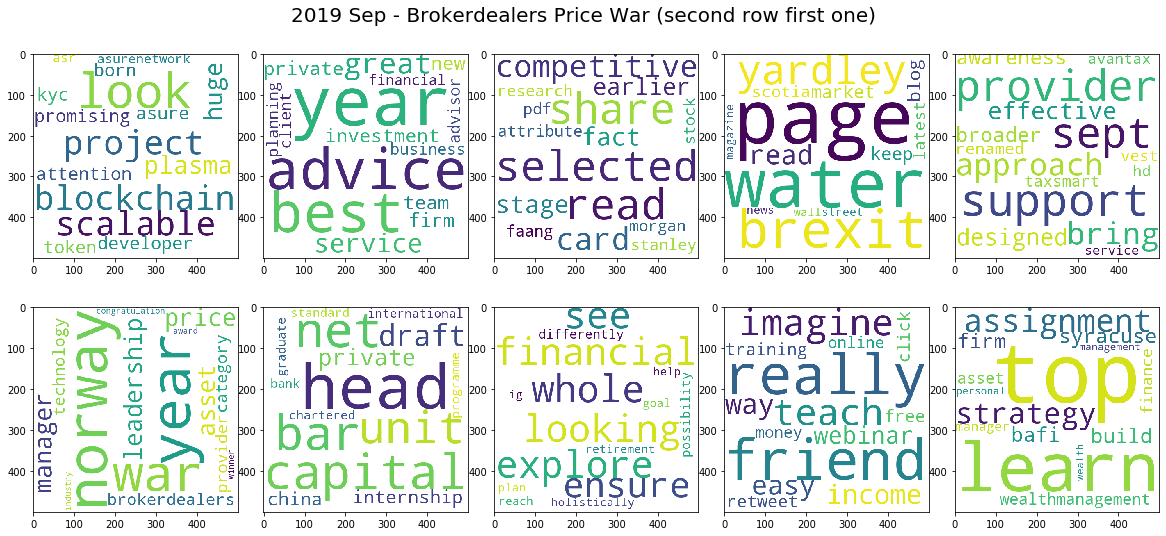

In [21]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
i = 0
for i in range(10):
    k = '201909'
    topic = " ".join([tfidf_vect[k].get_feature_names()[i] for i in nmf[k].components_[i].argsort()[-15:]])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
    
fig.suptitle("2019 Sep - Brokerdealers Price War (second row first one)", fontsize=20)

Text(0.5, 0.98, '2019 Nov - Charles Schwab to Acquire TD Ameritrade (first row last one)')

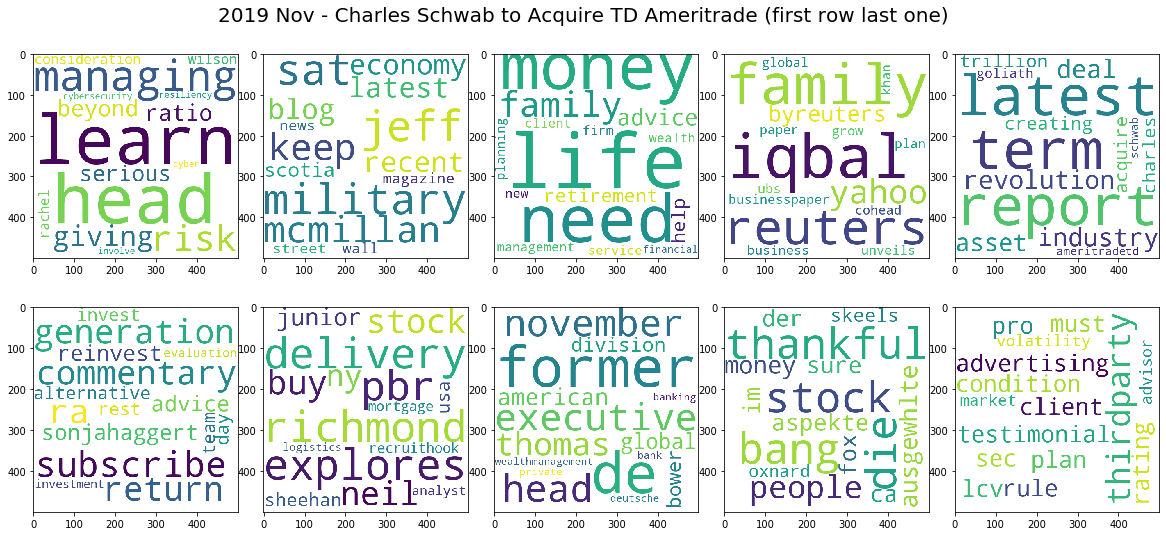

In [22]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
i = 0
for i in range(10):
    k = '201911'
    topic = " ".join([tfidf_vect[k].get_feature_names()[i] for i in nmf[k].components_[i].argsort()[-15:]])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
    
fig.suptitle("2019 Nov - Charles Schwab to Acquire TD Ameritrade (first row last one)", fontsize=20)

#Goldman Sachs to buy boutique wealth management custodian Folio

Text(0.5, 0.98, '2020 Feb - Morgan Stanley to Acquire E-trade (second row second one), Cybersecurity Conference')

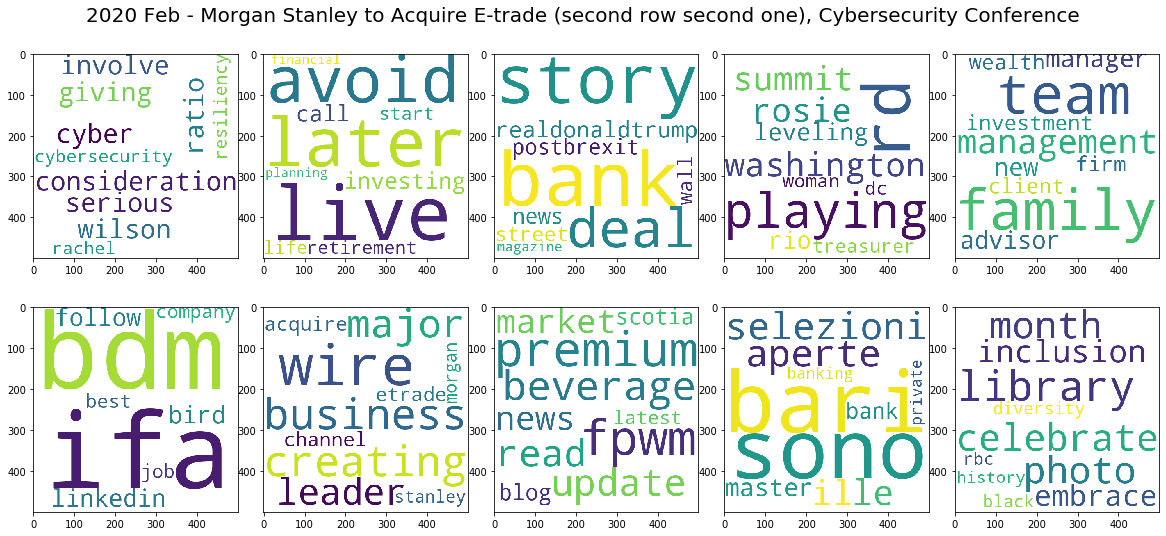

In [23]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
i = 0
for i in range(10):
    k = '202002'
    topic = " ".join([tfidf_vect[k].get_feature_names()[i] for i in nmf[k].components_[i].argsort()[-10:]])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
    
fig.suptitle("2020 Feb - Morgan Stanley to Acquire E-trade (second row second one), Cybersecurity Conference", fontsize=20)

Text(0.5, 0.98, '2020 May - Pandemic, Space, Goldman Sachs to Buy Folio (second row first one)')

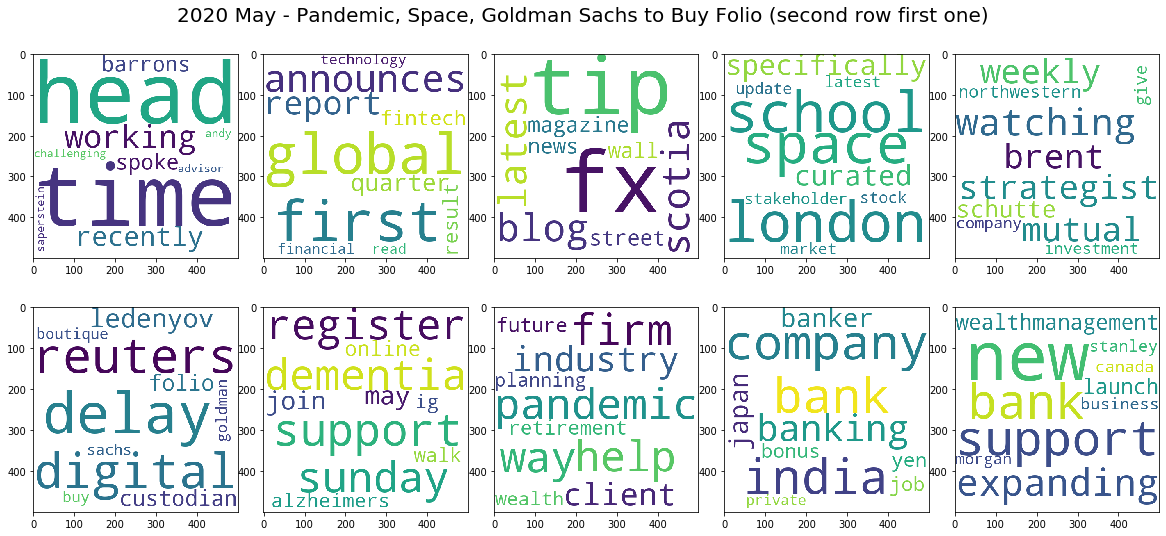

In [24]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
i = 0
for i in range(10):
    k = '202005'
    topic = " ".join([tfidf_vect[k].get_feature_names()[i] for i in nmf[k].components_[i].argsort()[-10:]])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
    
fig.suptitle("2020 May - Pandemic, Space, Goldman Sachs to Buy Folio (second row first one)", fontsize=20)

#Goldman Sachs to buy boutique wealth management custodian Folio

In [25]:
k = '202005'
for i,topic in enumerate(nmf[k].components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect[k].get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['time', 'head', 'working', 'recently', 'spoke', 'barrons', 'challenging', 'andy', 'saperstein', 'advisor']


Top 10 words for topic #1:
['global', 'first', 'announces', 'report', 'quarter', 'fintech', 'result', 'technology', 'financial', 'read']


Top 10 words for topic #2:
['fx', 'tip', 'blog', 'scotia', 'latest', 'since', 'magazine', 'street', 'wall', 'news']


Top 10 words for topic #3:
['school', 'london', 'space', 'specifically', 'curated', 'stakeholder', 'latest', 'stock', 'update', 'market']


Top 10 words for topic #4:
['watching', 'strategist', 'weekly', 'mutual', 'brent', 'schutte', 'northwestern', 'give', 'company', 'investment']


Top 10 words for topic #5:
['delay', 'digital', 'reuters', 'ledenyov', 'custodian', 'folio', 'boutique', 'sachs', 'buy', 'goldman']


Top 10 words for topic #6:
['support', 'dementia', 'sunday', 'register', 'may', 'join', 'online', 'alzheimers', 'ig', 'walk']


Top 10 words for topic #7:
['pandemic', 'help', 'firm', 'wa

### Method 3  Clustering (K-means)

1. #### Word2Vec Embedding

In [26]:
word2vec_model = {}
word_vectors = {}
cluster_words = {}

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [27]:
k = '202005'
word2vec_model[k] = Word2Vec(token_data[k], min_count = 1, size=32)
word_vectors[k] = word2vec_model[k].wv.syn0
num_clusters = 10

# Initalize a k-means object and use it to extract centroids

kmeans_clustering = KMeans(n_clusters = num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors[k])

word_centroid_map = dict(zip(word2vec_model[k].wv.index2word, idx))

for cluster in range(10):
    # Print the cluster number
    # print("\nCluster %d" % cluster)
    # Find all of the words for that cluster number, and print them out
    
    nlen = len(word_centroid_map)
    keys = list(word_centroid_map.keys())
    values = list(word_centroid_map.values())
    for i in range(nlen):
        if(values[i] == cluster):
            cluster_words[cluster] = cluster_words.get(cluster,"") + " " + keys[i]


C:\Users\hwk97\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0.98, '2020 May')

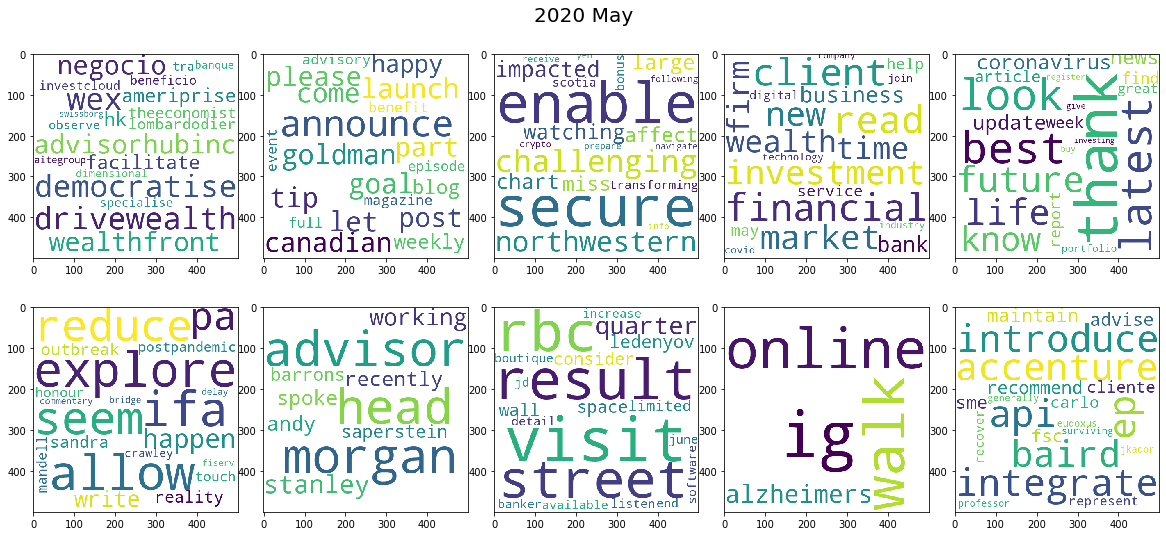

In [28]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
for i in range(10):
    topic = cluster_words[i]
    #" ".join([tfidf_vect[k].get_feature_names()[i] for i in nmf[k].components_[i].argsort()[-10:]])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', max_words=20,
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
    
fig.suptitle("2020 May", fontsize=20)

#### 2. TF-IDF Embedding

In [29]:
tfidf_vect = {}
tfidf = {}
kmeans_tfidf = {}

In [30]:
for k in string_data:
    tfidf_vect[k] = TfidfVectorizer(stop_words=stop)
    tfidf[k] = tfidf_vect[k].fit_transform(string_data[k])
    # k-means fit
    kmeans_tfidf[k] = KMeans(n_clusters=20).fit(tfidf[k])

#kmeans = KMeans(n_clusters = 10)
#idx = kmeans.fit_predict(tfidf)

Text(0.5, 0, 'frequencey')

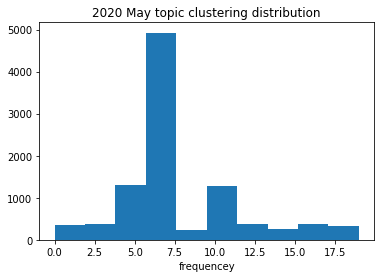

In [31]:
plt.title("2020 May topic clustering distribution")
plt.hist(kmeans_tfidf[k].labels_)
plt.xlabel('topic')
plt.xlabel('frequencey')

In [32]:
cluster_words = {}

for i in set(kmeans_tfidf[k].labels_):
    current_cluster = [string_data[k][x] for x in np.where(kmeans_tfidf[k].labels_ == i)[0]]
    cluster_words[i] = list(set(current_cluster))

Text(0.5, 0.98, '2020 May')

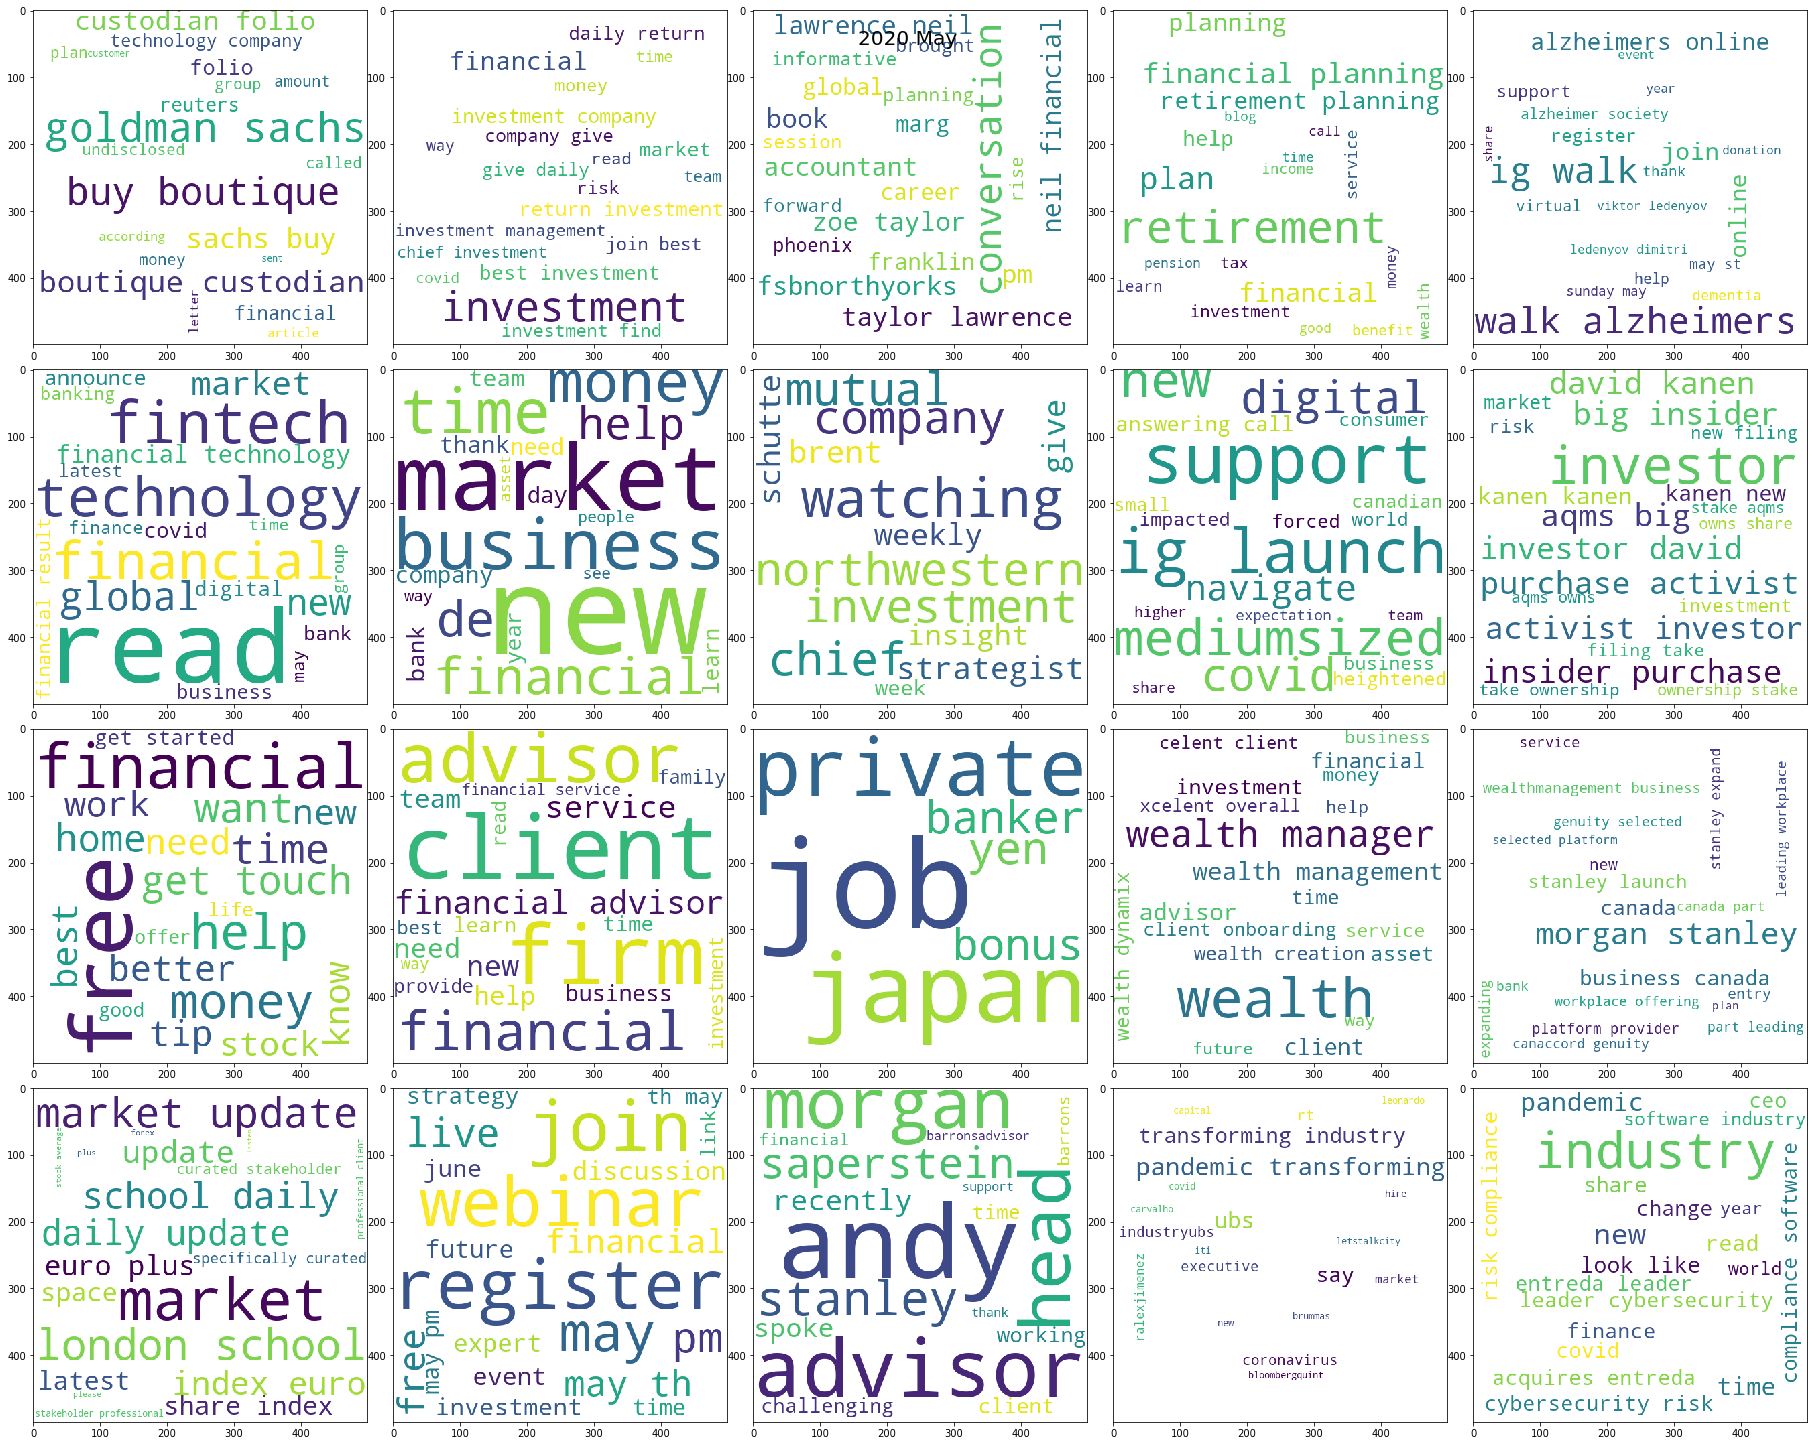

In [33]:
fig, axs = plt.subplots(4,5, figsize = (25, 20))
for i in range(20):
    topic = " ".join(cluster_words[i])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', max_words=20,
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
    
fig.suptitle("2020 May", fontsize=20)

In [39]:
kmeans_tfidf[k].cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
## Use  t-SNE to visualize

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
n = 20
tfs_reduced = TruncatedSVD(n_components=2, random_state=0).fit_transform(tfidf[k])
tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9798 samples in 0.009s...
[t-SNE] Computed neighbors for 9798 samples in 0.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9798
[t-SNE] Computed conditional probabilities for sample 2000 / 9798
[t-SNE] Computed conditional probabilities for sample 3000 / 9798
[t-SNE] Computed conditional probabilities for sample 4000 / 9798
[t-SNE] Computed conditional probabilities for sample 5000 / 9798
[t-SNE] Computed conditional probabilities for sample 6000 / 9798
[t-SNE] Computed conditional probabilities for sample 7000 / 9798
[t-SNE] Computed conditional probabilities for sample 8000 / 9798
[t-SNE] Computed conditional probabilities for sample 9000 / 9798
[t-SNE] Computed conditional probabilities for sample 9798 / 9798
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.815s
[t-SNE] Iteration 50: error = 88.0724182, gradient norm = 0.0265911 (50 iterations in 3.332s)
[t-SNE] Iteration 100:

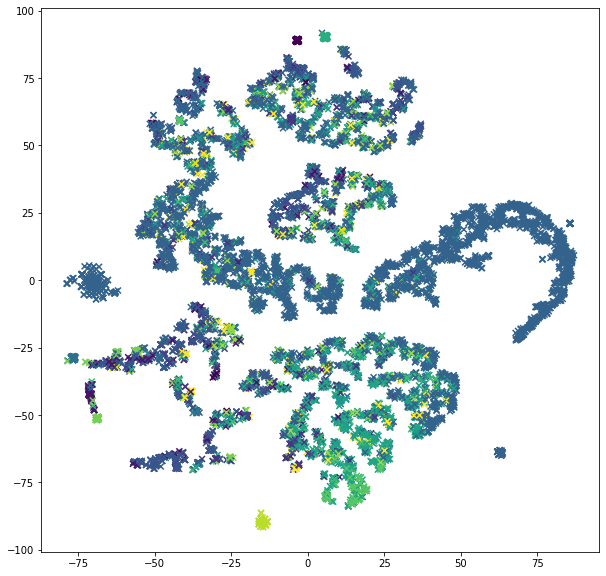

In [48]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = kmeans_tfidf[k].labels_)
plt.show()